<a href="https://colab.research.google.com/github/Vineet2107/ML-for-Civil-Engineering-CE784A-/blob/main/Vehicle_Detection_raw_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
# Importing all necessary libraries
import cv2
import os

# Read the video from specified path
cam = cv2.VideoCapture("/content/drive/MyDrive/Trimmed_accident_videos/5dwPSzpV9pw_AdobeExpress.mp4")

# try:
	
# 	# creating a folder named data
# 	if not os.path.exists('data'):
# 		os.makedirs('data')

# # if not created then raise error
# except OSError:
# 	print ('Error: Creating directory of data')

# frame
currentframe = 0

while(True):
	
	# reading from frame
	ret,frame = cam.read()

	if ret:
		# if video is still left continue creating images
		name = '/content/drive/MyDrive/data/frame' + str(currentframe) + '.jpg'
		print ('Creating...' + name)

		# writing the extracted images
		cv2.imwrite(name, frame)

		# increasing counter so that it will
		# show how many frames are created
		currentframe += 1
	else:
		break

# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()


Creating.../content/drive/MyDrive/data/frame0.jpg
Creating.../content/drive/MyDrive/data/frame1.jpg
Creating.../content/drive/MyDrive/data/frame2.jpg
Creating.../content/drive/MyDrive/data/frame3.jpg
Creating.../content/drive/MyDrive/data/frame4.jpg
Creating.../content/drive/MyDrive/data/frame5.jpg
Creating.../content/drive/MyDrive/data/frame6.jpg
Creating.../content/drive/MyDrive/data/frame7.jpg
Creating.../content/drive/MyDrive/data/frame8.jpg
Creating.../content/drive/MyDrive/data/frame9.jpg
Creating.../content/drive/MyDrive/data/frame10.jpg
Creating.../content/drive/MyDrive/data/frame11.jpg
Creating.../content/drive/MyDrive/data/frame12.jpg
Creating.../content/drive/MyDrive/data/frame13.jpg
Creating.../content/drive/MyDrive/data/frame14.jpg
Creating.../content/drive/MyDrive/data/frame15.jpg
Creating.../content/drive/MyDrive/data/frame16.jpg
Creating.../content/drive/MyDrive/data/frame17.jpg
Creating.../content/drive/MyDrive/data/frame18.jpg
Creating.../content/drive/MyDrive/data/fr

In [73]:
import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt
from skimage import io

In [74]:
# get file names of the frames
col_frames = os.listdir('/content/data/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('/content/data/'+ i)
    # append the frames to the list
    col_images.append(img)

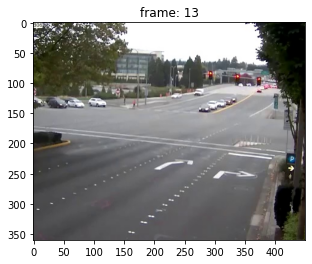

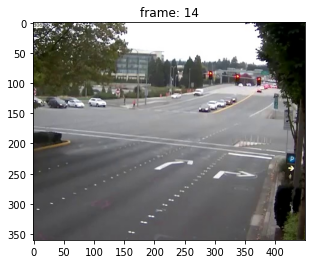

In [75]:
# plot 13th frame
i = 13

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

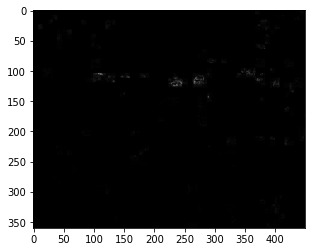

In [76]:
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[13], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[14], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

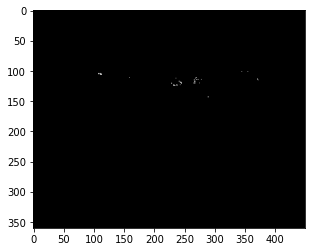

In [77]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

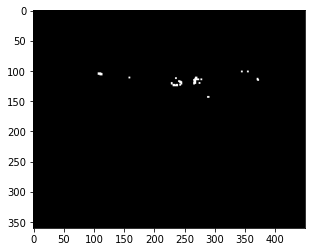

In [78]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

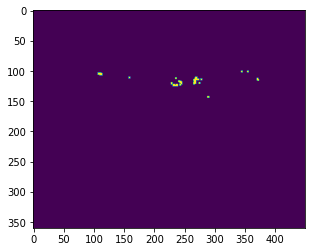

In [79]:

# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(256,80),(100, 0, 0))
plt.show()

In [80]:
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

In [81]:
valid_cntrs = []

for i,cntr in enumerate(contours):
    x,y,w,h = cv2.boundingRect(cntr)
    if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
        valid_cntrs.append(cntr)

# count of discovered contours        
len(valid_cntrs)

0

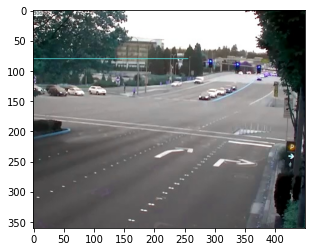

In [82]:

dmy = col_images[13].copy()

cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
plt.imshow(dmy)
plt.show()

In [83]:
# kernel for image dilation
kernel = np.ones((4,4),np.uint8)

# font style
font = cv2.FONT_HERSHEY_SIMPLEX

# directory to save the ouput frames
pathIn = "/content/drive/MyDrive/Untitled folder/"
#os.mkdir(pathIn)

for i in range(len(col_images)-1):
    
    # frame differencing
    grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)
    diff_image = cv2.absdiff(grayB, grayA)
    
    # image thresholding
    ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)
    
    # image dilation
    dilated = cv2.dilate(thresh,kernel,iterations = 1)
    
    # find contours
    contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    
    # shortlist contours appearing in the detection zone
    valid_cntrs = []
    for cntr in contours:
        x,y,w,h = cv2.boundingRect(cntr)
        if (x <= 200) & (y >= 80) & (cv2.contourArea(cntr) >= 25):
            if (y >= 90) & (cv2.contourArea(cntr) < 40):
                break
            valid_cntrs.append(cntr)
            
    # add contours to original frames
    dmy = col_images[i].copy()
    cv2.drawContours(dmy, valid_cntrs, -1, (127,200,0), 2)
    
    cv2.putText(dmy, "moving vehicles detected: " + str(len(valid_cntrs)), (55, 15), font, 0.6, (0, 180, 0), 2)
    cv2.line(dmy, (0, 80),(256,80),(100, 255, 255))
    cv2.imwrite(pathIn+str(i)+'.png',dmy)  

In [84]:
# specify video name
pathOut = '/content/drive/MyDrive/Untitled folder/vehicle_detection_v3.mp4'

# specify frames per second
fps = 14.0

In [85]:
frame_array = []
files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
print(len(files))

281


In [ ]:

files.sort(key=lambda f: int(re.sub('\D', '', f)))
print(len(files))

for i in range(len(files)):
    filename=pathIn + files[i]
    
    #read frames
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    print(size)
    
    #inserting the frames into an image array
    frame_array.append(img)

In [87]:
out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)

for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])

out.release()
cv2.destroyAllWindows()